In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
tesla = pd.read_csv('D:/Pratham/PYTHON/Stock Prediction/tesla.csv')

In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\Pratham\AppData\Local\Temp\ipykernel_2436\3702129700.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total Days = {(tesla.Date.max() - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total Days = 3181 days


In [6]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

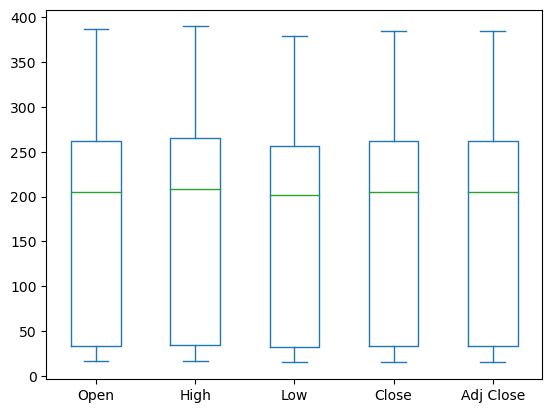

In [7]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
# creating layout
layout = go.Layout(
    title = 'Tesla Stock Price',
    xaxis = dict(
        title = 'Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
        ),
    yaxis = dict(
        title = 'Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
            )
        )
)

tesla_data = [{'x':tesla['Date'],'y':tesla['Close']}]
plot = go.Figure(data=tesla_data,layout=layout)

In [9]:
iplot(plot)

In [10]:
# building the regression model
from sklearn.model_selection import train_test_split

# for processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
# split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [12]:
# feature scaling 
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [15]:
# plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = tesla_data, layout=layout)

In [16]:
iplot(plot2)

In [17]:
# calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244576
MSE       1821.3833862936174	1780.9875394188443



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [20]:
data = pd.read_csv('D:/Pratham/PYTHON/Stock Prediction/Google_train_data.csv')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [24]:
data["Close"] = pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [27]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [28]:
X_train = []
Y_train = []
for i in range (60,1149): #60 is timestep and 1149 is the length of data
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])
    
X_train, Y_train = np.array(X_train),np.array(Y_train)

In [30]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [34]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [35]:
hist = model.fit(X_train,Y_train,epochs = 20,batch_size = 32, verbose = 2)

Epoch 1/20
35/35 - 23s - 651ms/step - loss: 0.0312
Epoch 2/20
35/35 - 10s - 287ms/step - loss: 0.0096
Epoch 3/20
35/35 - 11s - 306ms/step - loss: 0.0083
Epoch 4/20
35/35 - 9s - 268ms/step - loss: 0.0082
Epoch 5/20
35/35 - 8s - 229ms/step - loss: 0.0073
Epoch 6/20
35/35 - 7s - 210ms/step - loss: 0.0100
Epoch 7/20
35/35 - 12s - 335ms/step - loss: 0.0067
Epoch 8/20
35/35 - 9s - 251ms/step - loss: 0.0061
Epoch 9/20
35/35 - 9s - 266ms/step - loss: 0.0060
Epoch 10/20
35/35 - 11s - 308ms/step - loss: 0.0057
Epoch 11/20
35/35 - 10s - 280ms/step - loss: 0.0054
Epoch 12/20
35/35 - 9s - 252ms/step - loss: 0.0079
Epoch 13/20
35/35 - 7s - 210ms/step - loss: 0.0062
Epoch 14/20
35/35 - 8s - 242ms/step - loss: 0.0088
Epoch 15/20
35/35 - 10s - 274ms/step - loss: 0.0050
Epoch 16/20
35/35 - 10s - 281ms/step - loss: 0.0056
Epoch 17/20
35/35 - 10s - 287ms/step - loss: 0.0051
Epoch 18/20
35/35 - 10s - 282ms/step - loss: 0.0051
Epoch 19/20
35/35 - 7s - 201ms/step - loss: 0.0050
Epoch 20/20
35/35 - 12s - 335m

<function matplotlib.pyplot.show(close=None, block=None)>

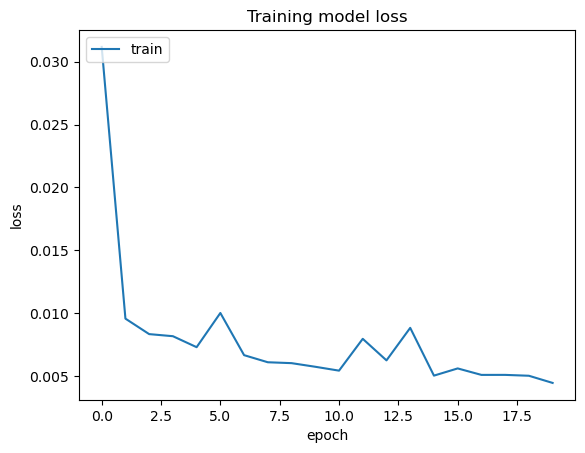

In [36]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show

In [39]:
testData = pd.read_csv('D:/Pratham/PYTHON/Stock Prediction/Google_test_data.csv')
testData['Close'] = pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values

inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [40]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [41]:
predicted_price = sc.inverse_transform(y_pred)

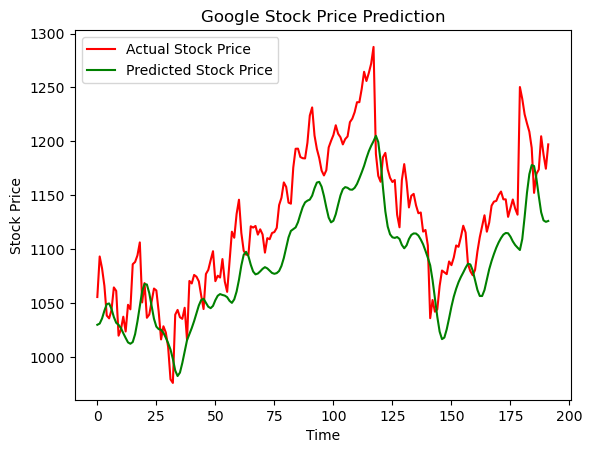

In [42]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()